In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt

In [4]:
fn = r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\RIDDHI\old_code_summer_internship_may2020\sst\ersst.190303.nc"
ds = nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link: C00884
    id: ersst.190303
    naming_authority: gov.noaa.ncdc
    title: NOAA ERSSTv3b (in situ only)
    summary: ERSST.v3b is developped based on Smith and Reynolds 2003
    institution: NOAA/NESDIS/NCEI/CCOG
    creator_name: Boyin Huang
    creator_email: boyin.huang@noaa.gov
    date_modified: 2017/01/27
    production_version: Version 5
    history: Fri Jan 27 08:57:44 2017: ncatted -O -a _FillValue,ssta,o,f,-999.0 ssta.nc
Version 5 based on Version 4
    publisher_name: Boyin Huang
    publisher_email: boyin.huang@noaa.gov
    creator_url: http://www.ncdc.noaa.gov
    license: No constraints on data access or use
    time_coverage_start: 1903-03-15T000000Z
    time_coverage_end: 1903-03-15T000000Z
    geospatial_lon_min: -1.0
    geospatial_lon_max: 359.0
    geospatial_lat_m

In [5]:
import xarray as xr

In [6]:
data = xr.open_dataset(r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\RIDDHI\old_code_summer_internship_may2020\sst\ersst.190303.nc")
print(data)

<xarray.Dataset>
Dimensions:  (lat: 89, lev: 1, lon: 180, time: 1)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1903-03-01
Data variables:
    sst      (time, lev, lat, lon) float32 ...
    ssta     (time, lev, lat, lon) float32 ...
Attributes: (12/41)
    Conventions:                CF-1.6
    Metadata_Conventions:       CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link:              C00884
    id:                         ersst.190303
    naming_authority:           gov.noaa.ncdc
    title:                      NOAA ERSSTv3b (in situ only)
    ...                         ...
    instrument:                 Conventional thermometers
    source:                     ICOADS R2.5 SST, NCEP GTS SST, HadISST ice, N...
    comment:                    SSTs were observed by conventional thermome

In [7]:
print(data['sst'])

<xarray.DataArray 'sst' (time: 1, lev: 1, lat: 89, lon: 180)>
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1903-03-01
Attributes:
    long_name:      Extended reconstructed sea surface temperature
    standard_name:  SST
    units:          degree_C
    valid_min:      -3.0
    valid_max:      45.0


In [8]:
import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap

In [9]:
file = r"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\RIDDHI\old_code_summer_internship_may2020\sst\ersst.190303.nc"
data = Dataset(file,mode='r')
print(type(data))
print(data.variables.keys())

<class 'netCDF4._netCDF4.Dataset'>
dict_keys(['lat', 'lev', 'lon', 'sst', 'time', 'ssta'])


In [10]:
lats = data.variables['lat'][:]
levs = data.variables['lev'][:]
lons = data.variables['lon'][:]
sst = data.variables['sst'][:]
time = data.variables['time'][:]
ssta = data.variables['ssta'][:]

In [11]:
sst.shape

(1, 1, 89, 180)

In [12]:
mp = Basemap(projection='mill',
             lat_ts = 10,
             llcrnrlon=np.min(lons),   # lower longitude
             llcrnrlat=np.min(lats),    # lower latitude
             urcrnrlon=np.max(lons),   # uppper longitude
             urcrnrlat=np.max(lats),   # uppper latitude
            resolution = 'i')

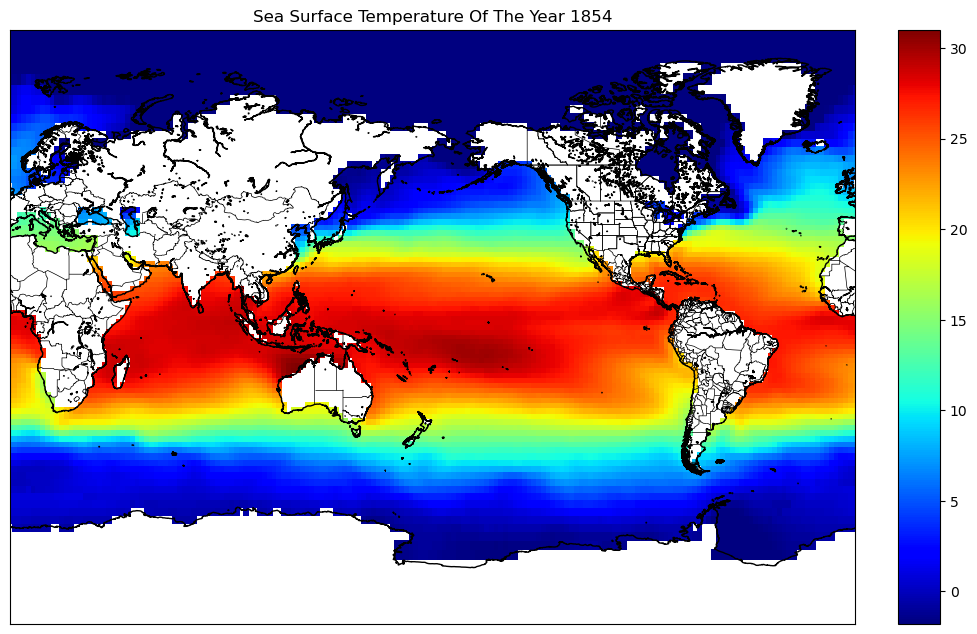

In [13]:
lon,lat = np.meshgrid(lons,lats)
x,y = mp(lon,lat)

plt.figure(figsize=(12,9))
c_schemes = mp.pcolor(x,y,np.squeeze(sst[0,:,:]),cmap = 'jet') # [0,:,:] is for the first day of the year)

    
#Consider this as the outline for the map that is to be created 
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()

cbar = mp.colorbar(c_schemes,location='right',pad = '5%') # map information
plt.title('Sea Surface Temperature Of The Year 1854')
plt.show()

In [14]:
sst.shape

(1, 1, 89, 180)

In [15]:
sst = sst.reshape(89,180)
X = pd.DataFrame(sst)
X.tail()

0         1         2         3        4         5         6    \
84 -1.726355 -1.537736 -1.547805 -0.794303 -0.15267 -0.704197 -1.336439   
85 -1.800000 -1.800000 -1.800000 -1.800000 -1.80000 -1.800000 -1.800000   
86 -1.800000 -1.800000 -1.800000 -1.800000 -1.80000 -1.800000 -1.800000   
87 -1.800000 -1.800000 -1.800000 -1.800000 -1.80000 -1.800000 -1.800000   
88 -1.800000 -1.800000 -1.800000 -1.800000 -1.80000 -1.800000 -1.800000   

         7         8         9    ...  170  171  172  173  174  175  176  177  \
84 -1.599502 -1.631955 -1.777844  ...  NaN -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8   
85 -1.800000 -1.800000 -1.800000  ... -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8   
86 -1.800000 -1.800000 -1.800000  ... -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8   
87 -1.800000 -1.800000 -1.800000  ... -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8   
88 -1.800000 -1.800000 -1.800000  ... -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8 -1.8   

    178  179  
84 -1.8 -1.8  
85 -1.8 -1.8  
86 -1.8 -1.8  
87 -1.8 -1.8  
88 -1.8 -1.8  

[5 rows x 180 columns]

In [15]:
lon

masked_array(
  data=[[  0.,   2.,   4., ..., 354., 356., 358.],
        [  0.,   2.,   4., ..., 354., 356., 358.],
        [  0.,   2.,   4., ..., 354., 356., 358.],
        ...,
        [  0.,   2.,   4., ..., 354., 356., 358.],
        [  0.,   2.,   4., ..., 354., 356., 358.],
        [  0.,   2.,   4., ..., 354., 356., 358.]],
  mask=False,
  fill_value=1e+20)